In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold

from skimage.io import imread, imshow, show, imshow_collection
from skimage.transform import resize, rescale, rotate

warnings.filterwarnings('ignore')

# Load Data

In [2]:
data_train_1 = pickle.load(open("data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("labels_train_batch_2.pkl", "rb"))

In [3]:
data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

In [4]:
data_test = pickle.load(open("data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("labels_test.pkl", "rb"))

# Scale Data

In [5]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# Train Model

In [6]:
m = KNeighborsClassifier()

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

# Use custom Cross-Vaidation to shuffle data
kf = KFold(n_splits=5, random_state=25, shuffle=True)

grid_search = GridSearchCV(m, parameters, cv=kf, verbose=3)
grid_search.fit(X_train_std, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.319 total time= 1.0min
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.329 total time=  44.6s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.325 total time=  24.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.316 total time=  23.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.329 total time=  23.6s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.338 total time=  24.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.349 total time=  24.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.351 total time=  24.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.336 total time=  24.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.353 total time=  24.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.328 total time=  26.6s
[CV 2/5] END ....n_neighbors=4, weights=uniform

[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.339 total time=  26.5s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.332 total time=  25.9s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.324 total time=  25.9s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.337 total time=  26.4s
[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.336 total time=  26.5s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=0.347 total time=  26.2s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.344 total time=  25.5s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.333 total time=  26.5s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.345 total time=  26.8s
[CV 1/5] END ...n_neighbors=14, weights=uniform;, score=0.325 total time=  26.4s
[CV 2/5] END ...n_neighbors=14, weights=uniform;, score=0.336 total time=  26.7s
[CV 3/5] END ...n_neighbors=14, weights=uniform;, score=0.333 total time=  26.2s
[CV 4/5] END ...n_neighbors=

[CV 4/5] END ...n_neighbors=23, weights=uniform;, score=0.315 total time=  26.3s
[CV 5/5] END ...n_neighbors=23, weights=uniform;, score=0.327 total time=  26.5s
[CV 1/5] END ..n_neighbors=23, weights=distance;, score=0.328 total time=  26.0s
[CV 2/5] END ..n_neighbors=23, weights=distance;, score=0.334 total time=  26.2s
[CV 3/5] END ..n_neighbors=23, weights=distance;, score=0.333 total time=  25.6s
[CV 4/5] END ..n_neighbors=23, weights=distance;, score=0.322 total time=  26.0s
[CV 5/5] END ..n_neighbors=23, weights=distance;, score=0.337 total time=  26.3s
[CV 1/5] END ...n_neighbors=24, weights=uniform;, score=0.318 total time=  26.8s
[CV 2/5] END ...n_neighbors=24, weights=uniform;, score=0.328 total time=  26.9s
[CV 3/5] END ...n_neighbors=24, weights=uniform;, score=0.328 total time=  26.1s
[CV 4/5] END ...n_neighbors=24, weights=uniform;, score=0.316 total time=  26.3s
[CV 5/5] END ...n_neighbors=24, weights=uniform;, score=0.324 total time=  26.4s
[CV 1/5] END ..n_neighbors=2

In [12]:
print("Model optimal parameters".upper())
print("n_neighbors:", model.get_params()["n_neighbors"])
print("weights:", model.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 6
weights: distance


# Test Model

In [9]:
predictions = model.predict(X_test_std)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy score:", accuracy)

Accuracy score: 0.3565


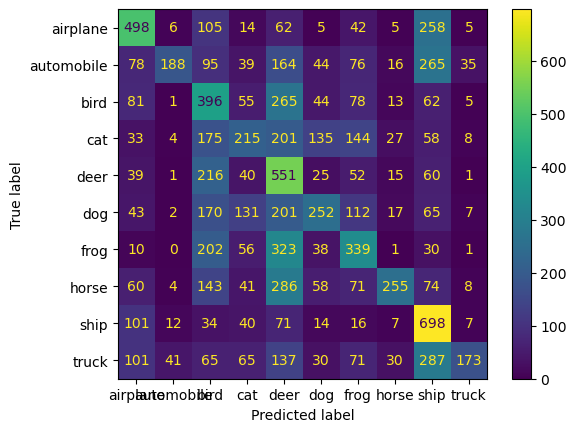

In [10]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Save Model

In [11]:
model_file_name = "KNN_32x32.pkl"
pickle.dump(model, open(model_file_name, "wb"))